In [5]:
%matplotlib inline
import pandas as pd
import platform
import sys
import numpy as np

import pyproj
from pyproj import Proj

import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

from datetime import datetime
pd.options.mode.chained_assignment = None


In [6]:
import wellapplication as wa

In [7]:
#saveplace = "E:/Google Drive/WORK/GSL Salinity Map/"
saveplace = "E:/PROJECTS/GSL/"

In [8]:
HUC8s = [16020310,16020308,16020305,16020304,16020204,16020102,16010204,16020309]
HUC10s =[1601020505,1601020405,1602010205,1602010206,1602010207,1602020404,1602030404,1602030405,
          1602030504,1602030505,1602030815,1602030818,1602030819,1602030905,1602030906,1602030907,
          1602031001,1602031002,1602030904,1602030908,1602030817,1602030816]

# WQP

## Import from Script

In [5]:
#sType=['Lake, Reservoir, Impoundment','Spring','Subsurface','Well','Wetland']
sType=['Spring','Subsurface','Well']
cType = ['Inorganics, Major, Metals', 'Inorganics, Major, Non-metals', 'Nutrient', 'Physical', 'Information',
         'Inorganics, Minor, Metals','Inorganics, Minor, Non-metals','Stable Isotopes']
sMedia = ['Water','water']

In [6]:
chem = wa.WQP('-113.25,40.6166,-111.833,41.85','bBox',siteType=sType,characteristicType=cType,sampleMedia=sMedia)

https://www.waterqualitydata.us/Result/search?mimeType=csv&zip=no&siteType=Spring&siteType=Subsurface&siteType=Well&sampleMedia=Water&sampleMedia=water&bBox=-113.25%2C40.6166%2C-111.833%2C41.85&characteristicType=Inorganics%2C+Major%2C+Metals&characteristicType=Inorganics%2C+Major%2C+Non-metals&characteristicType=Nutrient&characteristicType=Physical&characteristicType=Information&characteristicType=Inorganics%2C+Minor%2C+Metals&characteristicType=Inorganics%2C+Minor%2C+Non-metals&characteristicType=Stable+Isotopes&sorted=no


## WQP Results

In [7]:
Results = chem.massage_results()
Results.columns

Index(['OrgId', 'OrgName', 'SampleId', 'SampType', 'SampMedia', 'SampleDate',
       'SampDepth', 'SampDepthU', 'SampDepthRef', 'ProjectId', 'StationId',
       'SampComment', 'SampMeth', 'SampMethName', 'SampEquip', 'DetectCond',
       'Param', 'SampFrac', 'ResultValue', 'Unit', 'QualCode', 'ResultStatus',
       'ResultComment', 'USGSPCode', 'AnalytMeth', 'AnalytMethId',
       'MethodDescript', 'LabName', 'AnalysisDate', 'LabComments', 'LimitType',
       'MDL', 'MDLUnit'],
      dtype='object')

In [8]:
Results['SampMedia'].unique()

array([nan, 'Groundwater', 'Surface Water', 'Water QC Matrix',
       'Ground Water', 'Water'], dtype=object)

In [9]:
Results = Results[Results['SampMedia'] != 'Wet Fall Material']
Results = Results[Results['SampMedia'] != 'Water QC Matrix']
Results = Results[Results['SampMedia'] != 'Surface Water']

In [10]:
def mergegw(x):
    if x == 'Ground Water':
        return 'Groundwater'
    else:
        return x
    
Results['SampMedia'] = Results['SampMedia'].apply(lambda x: mergegw(x),1)

In [11]:
def cleanparam(x):
    return str(x).strip().title()

Results['Param'] = Results['Param'].apply(lambda x: cleanparam(x),1)

In [12]:
Results['data_source'] = 'WQP'

In [13]:
sample_counts = Results[['StationId','ResultValue','Param','SampMedia']].groupby(['SampMedia','Param']).count()
sample_counts.to_csv(saveplace+'Processed_Data/WQP_samp_counts.csv')

In [14]:
Results.to_csv(saveplace + 'Processed_Data/WQP_Results.csv')

In [15]:
Results.to_pickle(saveplace + 'Processed_Data/WQP_Results.pickle')

## WQP Stations

In [16]:
Stations = chem.massage_stations()
Stations.columns

Index(['OrgId', 'OrgName', 'StationId', 'StationName', 'StationType',
       'StationComment', 'HUC8', 'Lat_Y', 'Lon_X', 'HorAcc', 'HorAccUnit',
       'HorCollMeth', 'HorRef', 'Elev', 'ElevUnit', 'ElevAcc', 'ElevAccUnit',
       'ElevMeth', 'ElevRef', 'StateCode', 'CountyCode', 'Aquifer', 'FmType',
       'AquiferType', 'ConstDate', 'Depth', 'DepthUnit', 'HoleDepth',
       'HoleDUnit'],
      dtype='object')

In [17]:
Stations = Stations[Stations['StationId'].isin(Results.StationId.unique())]

In [18]:
Stations['HUC12'] = Stations.loc[:,['Lon_X','Lat_Y']].apply(lambda x: wa.get_huc(x)[0],1)


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [42]:
Stations['HUC10'] = Stations['HUC12'].apply(lambda x: int(x[0:-2]),1)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
Stations['data_source'] = "WQP"

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
Stations.to_csv(saveplace + 'Processed_Data/WQP_Stations.csv')
Stations.to_pickle(saveplace + 'Processed_Data/WQP_Stations.pickle')

# SDWIS

In [21]:
connection_filepath = "G:/PROJECTS/Groundwater Chemistry/"
sys.path.append(connection_filepath)
import oraconnection

In [22]:
connection = oraconnection.oraconnect()

In [255]:
def filldate(x):
    if pd.isnull(x['SampleDate']):
        return x['ActDate']
    else:
        pass



def sql_bbox(x, connection):
    """
    x = list of bbox coordinates; lat top, long left, lat bottom, long right
    returns stations, chemistry
    """
    
    SQLtext = """
    SELECT 
    UTV80.TINWSF.TINWSF_IS_NUMBER AS "StationId",
    UTV80.TINWSF.NAME AS "StationName",
    UTV80.TINWSF.TYPE_CODE AS "StationType",
    UTV80.TINWSYS.TINWSYS_IS_NUMBER AS "OrgId",
    UTV80.TINWSYS.NAME AS "OrgName",
    UTV80.TINLOC.LATITUDE_MEASURE AS "Lat_Y",
    UTV80.TINLOC.LONGITUDE_MEASURE AS "Lon_X",
    UTV80.TINLOC.SRC_MAP_SCALE_NUM AS "MapScale",
    UTV80.TINLOC.HORIZ_ACCURACY_MSR AS "HorAcc",
    UTV80.TINLOC.HZ_COLLECT_METH_CD AS "HorCollMeth",
    UTV80.TINLOC.HORIZ_REF_DATUM_CD AS "HorRef",
    UTV80.TINLOC.VERTICAL_MEASURE AS "Elev",
    UTV80.TINLOC.VERT_ACCURACY_MSR AS "ElevAcc",
    UTV80.TINLOC.VER_COL_METH_CD AS "ElevMeth",
    UTV80.TINLOC.VERT_REF_DATUM_CD AS "ElevRef",
    UTV80.TINWSF.ACTIVITY_DATE AS "ActDate",
    UTV80.TINWSF.ACTIVITY_STATUS_CD AS "ActStatus"

    FROM
    UTV80.TINWSF
    JOIN UTV80.TINWSYS ON  UTV80.TINWSF.TINWSYS_IS_NUMBER = UTV80.TINWSYS.TINWSYS_IS_NUMBER  
    JOIN UTV80.TINLOC ON  UTV80.TINWSF.TINWSF_IS_NUMBER = UTV80.TINLOC.TINWSF_IS_NUMBER 

    WHERE
    (UTV80.TINWSF.TYPE_CODE IN('WL','SP','IN')) -- Spring, well, or intake
    AND (UTV80.TINLOC.LATITUDE_MEASURE < {:})
    AND (UTV80.TINLOC.LONGITUDE_MEASURE > {:})
    AND(UTV80.TINLOC.LATITUDE_MEASURE > {:})
    AND (UTV80.TINLOC.LONGITUDE_MEASURE < {:})
    """
    SQL = SQLtext.format(x[0],x[1],x[2],x[3]) # 40.44, -111.51, 40.30, -111.35
    stations = pd.read_sql(SQL, con = connection)
    stations['StationName'] = stations['StationName'].apply(lambda x: str(x).strip().title(), 1)
    
    stlist = list(stations['StationId'].unique())
    stlist = [str(i) for i in stlist]
    SQLtext = """
    SELECT
    UTV80.TINWSF.TYPE_CODE AS "SampType", 
    UTV80.TINWSF.TINWSF_IS_NUMBER AS "StationId", 
    UTV80.TINWSYS.TINWSYS_IS_NUMBER AS "OrgId", 
    UTV80.TINWSYS.NAME AS "OrgName", 
    UTV80.TSASAMPL.TSASAMPL_IS_NUMBER AS "SampleId", 
    UTV80.TSASAMPL.COLLLECTION_END_DT AS "SampleDate", 
    UTV80.TSASAMPL.COLLCTN_END_TIME AS "SampleTime", 
    UTV80.TSAANLYT.NAME AS "Param", 
    UTV80.TSASAR.CONCENTRATION_MSR AS "ResultValue", 
    UTV80.TSASAR.UOM_CODE AS "Unit", 
    UTV80.TSASAR.ANALYSIS_START_DT AS "AnalysisDate", 
    UTV80.TSASAR.DETECTN_LIMIT_NUM AS "MDL", 
    UTV80.TSASAR.DETECTN_LIM_UOM_CD AS "MDLUnit", 
    UTV80.TSAANLYT.CAS_REGISTRY_NUM AS "CAS_Reg", 
    UTV80.TSASAR.TSASAR_IS_NUMBER AS "ID_NUM",
    UTV80.TSASAMPL.COMMENT_TEXT AS "SamplePointComment",
    UTV80.TSASMPPT.DESCRIPTION_TEXT AS "SamplePointDesc"

    FROM 
    UTV80.TINWSF -- Water System Facility (water source)
    JOIN UTV80.TINWSYS ON -- Water System (town or water provider)
    UTV80.TINWSF.TINWSYS_IS_NUMBER = UTV80.TINWSYS.TINWSYS_IS_NUMBER 
    JOIN UTV80.TSASMPPT ON  -- Sample point
    UTV80.TINWSF.TINWSF_IS_NUMBER = UTV80.TSASMPPT.TINWSF0IS_NUMBER
    JOIN UTV80.TSASAMPL ON -- Sample
    UTV80.TSASMPPT.TSASMPPT_IS_NUMBER = UTV80.TSASAMPL.TSASMPPT_IS_NUMBER  -- Sample Point
    JOIN UTV80.TSASAR ON -- Sample Result
    UTV80.TSASAMPL.TSASAMPL_IS_NUMBER = UTV80.TSASAR.TSASAMPL_IS_NUMBER   -- Sample Number
    JOIN UTV80.TSAANLYT ON -- Analyte
    UTV80.TSASAR.TSAANLYT_IS_NUMBER = UTV80.TSAANLYT.TSAANLYT_IS_NUMBER  -- Analyte Number

    WHERE (UTV80.TINWSF.TYPE_CODE IN('WL','SP','IN')) -- Spring or well or intake
    AND UTV80.TSASMPPT.SOURCE_TYPE_CODE = 'RW' -- Raw (unfiltered) water
    AND UTV80.TSASMPPT.TYPE_CODE IN('RW','EP','SR') -- From source
    AND UTV80.TINWSF.TINWSF_IS_NUMBER IN('{:}') 
    ORDER BY UTV80.TINWSF.ST_ASGN_IDENT_CD
    """
    
    SQL = SQLtext.format("','".join(stlist))
    chemistry = pd.read_sql(SQL, con = connection, parse_dates=['SampleDate','SampleTime','AnalysisDate'])
    chemistry['SampleDate'] = chemistry[["SampleDate", "SampleTime"]].apply(lambda x:pd.to_datetime(x[0],
                                                                                                    errors='ignore',
                                                                                                    format="%Y-%m-%d %H:%M"), 1)
    chemistry['SampleDate'] = chemistry.apply(lambda x: filldate(x),1)
    
    return stations, chemistry

In [24]:
def piv_chem(stations, chemistry):
    
    paramdict = {'nitrate-nitrite':'NO3+NO2-N', 'nitrate':'NO3', 'sulfate':'SO4',
             'nitrite':'NO2', 'turbidity':'turb', 'silver':'Ag',
             'barium':'Ba', 'fluoride':'F', 
             'potassium':'K', 'arsenic':'As', 'mercury':'Hg',
             'sodium':'Na', 'selenium':'Se', 'cadmium':'Cd',
             'copper, free':'Cu', 'zinc':'Zn', 'silica':'Si',
             'magnesium':'Mg', 'lead':'Pb', 'calcium':'Ca',
             'nitrogen-ammonia as (n)':'NH4-N', 'chloride':'Cl', 
             'iron':'Fe', 'manganese':'Mn', 'phosphate, total':'PO4', 
             'carbon dioxide':'CO2', 'bicarbonate as hco3':'HCO3', 
             'alkalinity, total':'Alk', 'tds':'TDS', 'hardness, carbonate':'Hard', 
             'conductivity @ 25 c umhos/cm':'Cond', 
             'hardness, total (as caco3)':'Hard','iron, dissolved':'Fe', 'ph':'pH',
             'alkalinity, carbonate':'Alk'}
    
    
    chemistry['Param'] = chemistry['Param'].apply(lambda x: str(x).strip().lower(),1)
    chemistry['ParAbb'] = chemistry['Param'].apply(lambda x: paramdict.get(x),1)
    chemistry.drop_duplicates(subset=['SampleId','ParAbb'],inplace=True)
    chem_piv = chemistry.pivot(index='SampleId',columns='ParAbb',values='ResultValue')
    chem_piv.reset_index(inplace=True)

    chem_dict = chemistry[['SampleId','StationId']].set_index('SampleId').to_dict()['StationId']
    chem_piv['StationId'] =chem_piv['SampleId'].apply(lambda x: chem_dict.get(x),1)
    chem_piv = pd.merge(chem_piv,stations,on='StationId')
    
    sampdatedict = chemistry[['SampleId','SampleDate']].set_index('SampleId').to_dict()['SampleDate']
    chem_piv['SampleDate'] = chem_piv['SampleId'].apply(lambda x: sampdatedict.get(x), 1)

    chem_piv_piper = chem_piv.dropna(subset=['Ca','Na','SO4','Cl','Mg','HCO3'])
    chem_piv_piper = chem_piv_piper[(chem_piv_piper['Na'] > 0)&(chem_piv_piper['SO4'] > 0)&(chem_piv_piper['Cl'] > 0)]
    chem_piv_piper = reind_inc(chem_piv_piper)
    return chem_piv, chem_piv_piper

In [25]:
def reind_inc(df):
    df['increment'] = range(0,len(df))
    df = df.reset_index(['increment'])
    return df


def df_to_published_data(df,title):

    df.rename(columns={'Lat_Y':'y','Lon_X':'x'},inplace=True)
    fc = gis.content.import_data(df)
    map1 = gis.map(location= [df.x.mean(),df.y.mean()], zoomlevel=12)
    map1.add_layer(fc)#,{"renderer":"ClassedSizeRenderer","field_name": "TDS"})
    xmin = round(df.x.min()-0.1,2)
    ymin = round(df.y.min()-0.1,2)
    xmax = round(df.x.max()+0.1,2)
    ymax = round(df.y.max()+0.1,2)

    item_properties = {
        "title": title,
        "tags" : "utah, groundwater,water quality",
        "snippet": "Round Valley Water Quality",
        "description": "samples collected by UGS",
        "text": json.dumps({"featureCollection": {"layers": [dict(fc.layer)]}}),
        "type": "Feature Collection",
        "typeKeywords": "Data, Feature Collection, Singlelayer",
        "extent" : "{:},{:},{:},{:}".format(xmin,ymin,xmax,ymax)
    }

    item = gis.content.add(item_properties)
    return item, map1

In [256]:
sdwis_stations, sdwis_chemistry = sql_bbox([41.85, -113.25, 40.6166, -111.833],connection)
sdwis_chem_piv, sdwis_chem_piv_piper = piv_chem(sdwis_stations, sdwis_chemistry)
#wa.piper(chem_piv_piper,type_col='',var_col='TDS')

In [257]:
sdwis_drop = ['aroclor 1016', 'aroclor 1248', 'coliform (tcr)','di(2-ethylhexyl) adipate',
              '1,2-dichloropropane', 'dichlorodifluoromethane', 'trichlorotrifluoroethane', '1,1-dichloroethylene',
              'trans-1,3-dichloropropene', 'atrazine', 'trans-1,2-dichloroethylene', 'dichloromethane',
              'hexachlorobenzene', 'benzene', 'carbon, total',
              'aldicarb sulfone', '1,2,4-trichlorobenzene', 'propachlor', 'xylenes, total', 
              'toluene', '2,4,5-tp', 'radium-228','chloroform', 'isopropylbenzene', 'di(2-ethylhexyl) phthalate',
              '3-hydroxycarbofuran', 'lasso',
              'dibromochloromethane', 'bhc-gamma', 'carbofuran', 'styrene',
              'total polychlorinated biphenyls (pcb)', 'hexachlorocyclopentadiene', 'p-dichlorobenzene', 'simazine',
              'methomyl', 'picloram', 'vinyl chloride', 'benzo(a)pyrene',
              'hexachlorobutadiene', 'bromomethane', 'aroclor 1242', 'p-isopropyltoluene', 
              'dieldrin','methoxychlor', '1,1,1-trichloroethane', 
              'oxamyl', 'bromobenzene', 'butachlor', '1,2,4-trimethylbenzene', 'dinoseb', 
              '1,1,2-trichloroethane', 'o-chlorotoluene', 'dalapon',
              'chloromethane', 'gamma-chlordane', 'cis-1,2-dichloroethylene',
              'o-dichlorobenzene', 'aldicarb', '1,3-dichloropropane',
              'chlorobenzene', 'heptachlor', 'trichloroethylene', '1,2,3-trichloropropane', 
              'aldicarb sulfoxide','1,2-dichloroethane', 'carbon tetrachloride',
              'chlordane', 'ethylbenzene', 'sec-butylbenzene',
              'bromodichloromethane', 'e. coli','mbas - foaming agents (surfactants)', 'bromochloromethane',
              '1,1-dichloropropene', 'metolachlor', 'endrin','dichlorobenzenes, total', 
              'p-chlorotoluene', 'tetrachloroethylene',
              'toxaphene', 'naphthalene', 'foaming agents (surfactants)',
              'carbaryl', 'chloroethane', 'pentachlorophenol', 'aroclor 1254',
              'cryptosporidium', 'trichlorofluoromethane',
              '1,3,5-trimethylbenzene', 'dicamba', '2,2-dichloropropane',
              '1,2,3-trichlorobenzene', '2,4-d', 'heptachlor epoxide', 'metribuzin', 'chlorine',
              'n-butylbenzene', '1,3-dichloropropene', '1,1-dichloroethane',
              '1,1,1,2-tetrachloroethane', 'tthm', 'bromoform', 'aldrin',
              '1,1,2,2-tetrachloroethane', 'tert-butylbenzene',
              'n-propylbenzene', 'gross alpha particle activity', 'radium-226','ethylene dibromide',
              'asbestos', 'endothall', 'aroclor 1260', 'n-nitrosodi-n-propylamine',
              'trichloroacetic acid', '38-strontium-90', '2,3,7,8-tcdd',
              'methyl tert-butyl ether', 'diquat',
              'bis(2-ethylhexyl) phthalate', 'm-xylene', 'aroclor 1232', 'color', 'alpha-chlordane',
              'cis-1,3-dichloropropene', 'm-dichlorobenzene', 'dibromomethane',
              'total haloacetic acids (haa5)', 'aroclor 1221', '1,2-dibromo-3-chloropropane',
              'uv absorbance @254 nm','perchlorate']

sdwis_chemistry = sdwis_chemistry[~sdwis_chemistry['Param'].isin(sdwis_drop)]

In [258]:
sdwis_stations = sdwis_stations[sdwis_stations['StationId'].isin(sdwis_chemistry['StationId'].unique())]

In [259]:
sdwis_chem_piv['data_source'] = 'SDWIS'
sdwis_chemistry['data_source'] = 'SDWIS'
sdwis_stations['data_source'] = 'SDWIS'

In [260]:
sdwis_stations.head()

,StationId,StationName,StationType,OrgId,OrgName,Lat_Y,Lon_X,MapScale,HorAcc,HorCollMeth,HorRef,Elev,ElevAcc,ElevMeth,ElevRef,ActDate,ActStatus,data_source
1,2994,Acme Well,WL,6,ACME WATER COMPANY,41.632167,-112.065619,"24,000",15.0,018,003,1376.41,2.48,003,003,1977-06-01,A,SDWIS
2,5315,South #3 Spring,SP,6,ACME WATER COMPANY,41.630396,-112.060441,"24,000",15.0,018,003,1426.90,2.56,003,003,1977-06-01,A,SDWIS
3,5314,South #2 Spring,SP,6,ACME WATER COMPANY,41.629383,-112.061361,"24,000",15.0,018,003,1407.34,2.97,003,003,1977-06-01,A,SDWIS
4,5313,So.- #1(Unused) Spring,SP,6,ACME WATER COMPANY,41.629641,-112.060813,"24,000",15.0,018,003,1417.86,2.64,003,003,1977-06-01,I,SDWIS
5,5312,Chokecherry Spring,SP,6,ACME WATER COMPANY,41.632683,-112.058872,"24,000",15.0,018,003,1461.01,3.07,003,003,1977-06-01,A,SDWIS


In [261]:
sdwis_stations['HUC12'] = sdwis_stations[['Lon_X','Lat_Y']].apply(lambda x: wa.get_huc(x)[0],1)

In [262]:
sdwis_stations['HUC10'] = sdwis_stations['HUC12'].apply(lambda x: int(x[0:-2]),1)

In [263]:
sdwis_stations.to_pickle(saveplace + 'Processed_Data/sdwis_stations.pickle')
sdwis_chemistry.to_pickle(saveplace + 'Processed_Data/sdwis_results.pickle')

# AQWMS

In [264]:
aqwms_file = saveplace + 'Standard Export 18665.xlsx'

In [265]:
awqms = pd.read_excel(aqwms_file,skiprows=1)

dropcols = []
for column in list(awqms.describe().columns):
    if awqms.describe().loc['count',column] == 0:
        dropcols.append(column)
        
awqms.drop(dropcols, axis=1, inplace=True)

awqms['SampleDate'] = awqms[["Activity Start Date","Activity Start Time"]].apply(lambda x: pd.to_datetime(str(x[0])[:11]+str(x[1])[-8:],
                                                                                                                  format='%Y-%m-%d %H:%M:%S',
                                                                                                                  errors='coerce'),1)

In [267]:
ResFieldDict = {
                "Activity Conducting Organization1":"OrgName",
                "Monitoring Location ID":"StationId",
                "Monitoring Location Name":"StationName", 
                "Monitoring Location Type":"StationType",
                "Monitoring Location State":"StateCode", 
                "Monitoring Location Latitude":"Lat_Y",
                "Monitoring Location Longitude":"Lon_X", 
                "AnalysisStartDate": "AnalysisDate", 
                "Analytical Method ID": "AnalytMeth",
                "Analytical Method Name": "AnalytMethId",
                "Detection Condition": "DetectCond",
                "Laboratory Comment": "LabComments", 
                "Laboratory Name": "LabName",
                "Detection Limit Type1": "LimitType",
                "Detection Limit Value1": "MDL",
                "Detection Limit Unit1": "MDLUnit",
                "MethodDescriptionText": "MethodDescript",
                "Organization ID": "OrgId", 
                "Characteristic Name": "Param",
                "Project Identifier": "ProjectId", 
                "MeasureQualifierCode": "QualCode",
                "Result CommentText": "ResultComment",
                "Result Status ID": "ResultStatus", 
                "Result Value": "ResultValue",
                "Activity Comment Text": "SampComment", 
                "Activity Depth/Height": "SampDepth",
                "Activity Depth/Altitude Reference Point": "SampDepthRef",
                "Activity Depth/Height Unit": "SampDepthU",
                "Sample Collection EquipmentName": "SampEquip",
                "Sample Fraction": "SampFrac", "ActivityStartDate": "SampleDate",
                "Activity ID": "SampleId",
                "Activity Start Time": "SampleTime", 
                "Activity Media Subdivision": "SampMedia",
                "Sample Collection Method ID": "SampMeth",
                "Sample Collection Method Name": "SampMethName",
                "Activity Type": "SampType", 
                "Monitoring Location Identifier": "StationId",
                "Result Unit": "Unit", 
                "USGSPCode": "USGSPCode"}

# Rename Data
awqms = awqms.rename(columns=ResFieldDict)

In [268]:
droplist = ['Depth, data-logger (ported)', 'Velocity - stream', 
            'Biochemical oxygen demand, standard conditions', 'Total Coliform',
            'Escherichia', 'p-Chlorophenyl phenyl ether', '4,6-Dinitro-o-cresol',
            'Acenaphthylene', 'Butyl benzyl phthalate', '1,1,2-Trichloroethane',
            'Bis(2-chloro-1-methylethyl) ether', "3,3'-Dichlorobenzidine",
            'Dibutyl phthalate', 'Benzo[ghi]perylene', 'Nitrobenzene',
            'Di(2-ethylhexyl) phthalate', 'm-Dichlorobenzene',
            'Benz[a]anthracene', 'Ethylene dibromide', 'p-Dichlorobenzene',
       'tert-Butylbenzene', 'Benzene', 'N-Nitrosodimethylamine', 'Cymene',
       'Methylene chloride', 'meta & para Xylene mix', 'sec-Butylbenzene',
       'Carbon tetrachloride', 'Acenaphthene', '1,1-Dichloropropene',
       '2,4-Dinitrophenol', 'Chlorodibromomethane', 'C1-C4 Fluoranthenes',
       'o-Chlorotoluene', 'm-Nitroaniline', 'Isophorone', 'Cumene',
       'n-Butylbenzene', 'Dibenzofuran',
       '1,1,1,2-Tetrachloroethane', 'trans-1,2-Dichloroethylene',
       'Dichlorobromomethane', '2,4,6-Trichlorophenol', 'Vinyl chloride',
       '1,2-Dichloroethane', 'Bis(2-chloroethoxy)methane',
       '1,1-Dichloroethylene', 'o-Cresol',
       'trans-1,3-Dichloropropene', '1,2,4-Trichlorobenzene',
       '2,2-Dichloropropane', 'p-Bromophenyl phenyl ether',
       'cis-1,3-Dichloropropene', 'p-Chlorotoluene',
       'Dibenz[a,h]anthracene', 'Benzo[k]fluoranthene',
       'C1-C4 Phenanthrenes', '1,2,3-Trichlorobenzene', 'Dibromomethane',
       'Bis(2-chloroethyl) ether', 'o-Xylene', 'N-Nitrosodiphenylamine',
       'p-Chloroaniline', 'Chloroethane', '2,4-Dinitrotoluene',
       'cis-1,2-Dichloroethylene', 'Hexachlorobenzene', 'o-Nitroaniline',
       '1,2,3-Trichloropropane', 'Trichloroethylene', '2,4-Dichlorophenol',
       '2,6-Dinitrotoluene', 'Benzyl alcohol', 'Chlorobenzene',
       'Ethylbenzene', 'C1-C3 Fluorenes', 'Diethyl phthalate', 'Pyrene',
       'o-Dichlorobenzene', 'Benzoic acid', 'Indeno[1,2,3-cd]pyrene',
       '2,4-Dimethylphenol', '1,3-Dichloropropane', 'p-Chloro-m-cresol',
       'Tetrachloroethylene', 'Naphthalene', 'Toluene',
       'Di-n-octyl phthalate', 'Methyl tert-butyl ether',
       'n-Propylbenzene', 'Anthracene', 'Benzidine', '2-Methylnaphthalene',
       'Pentachlorophenol', 'Chloromethane',
       'Benzo(b)fluoranthene', 'Hexachloroethane',
       '1,3,5-Trimethylbenzene', 'Tribromomethane',
       'Hexachlorocyclopentadiene', 'Azobenzene', 'Hexachlorobutadiene',
       'Benzo[a]pyrene', 'Halon 1011', 'Bromobenzene',
       '2,4,5-Trichlorophenol', 'Aniline', 'Styrene',
       '1,1,2,2-Tetrachloroethane', '2-Chloronaphthalene',
       'o-Chlorophenol', 'p-Nitroaniline', 'N-Nitrosodi-n-propylamine',
       'p-Nitrophenol', 'Phenol', 'Chloroform', 'Carbazole',
       '1,2,4-Trimethylbenzene', 'Dimethyl phthalate',
       '1,2-Dichloropropane', '1,1-Dichloroethane', 'o-Nitrophenol',
       'C1-C4 Chrysenes', 'Cresol', 'Methyl bromide',
       '1,2-Dibromo-3-chloropropane', '1,1,1-Trichloroethane',
       'Chemical oxygen demand', 'Perchlorate', 'Fecal Coliform',
       'Gasoline range organics', 'Hydrocarbons, petroleum',
       'Diesel range organics',
       'Chlorophyll a, uncorrected for pheophytin',
       'Depth, Secchi disk depth', 'Total volatile solids',
       'Oil and Grease', 'Ethylene glycol', 'Propylene glycol allyl ether',
       'Biomass, periphyton', 'Chlorophyll a',
       'Carbonaceous biochemical oxygen demand, standard conditions',
       'Dibromodichloromethane',
       'o-Xylene, mixt. with m-xylene and p-xylene', 'p-Cymene',
       'Bis(2-chloroisopropyl) ether', 'Chrysene', 'Fluoranthene',
       'Phenanthrene', 'Pheophytin a',
       'Chlorophyll a, corrected for pheophytin']

In [269]:
awqms = awqms[~awqms['Param'].isin(droplist)]

In [270]:
awqms.Param.unique()

array(['Dissolved oxygen (DO)', 'Temperature, water', 'Flow',
       'Specific conductance', 'pH', 'Kjeldahl nitrogen',
       'Fecal Streptococcus Group Bacteria', 'Nitrite',
       'Total dissolved solids', 'Ammonia-nitrogen', 'Orthophosphate',
       'Nitrate', 'Phosphate-phosphorus', 'Total suspended solids',
       'Copper', 'Iron', 'Zinc', 'Manganese', 'Lead',
       'Dissolved oxygen saturation', 'Bicarbonate', 'Carbon dioxide',
       'Carbonate', 'Inorganic nitrogen (nitrate and nitrite)', 'Sulfate',
       'Alkalinity, total', 'Nitrogen', 'Chloride', 'Aluminum', 'Arsenic',
       'Barium', 'Boron', 'Cadmium', 'Calcium', 'Chromium',
       'Hardness, Ca, Mg', 'Magnesium', 'Nickel', 'Potassium', 'Selenium',
       'Silver', 'Sodium', 'Mercury', 'Hydroxide', 'Turbidity',
       'Calcium carbonate', 'Organic carbon', 'Sum of anions',
       'Sum of cations', 'Salinity', 'Depth', 'Silica',
       'Settleable solids', 'Temperature, air', 'Specific gravity', 'MBAS',
       'Fluoride

In [271]:
awqms = awqms[awqms['StationType'].isin(['Well', 'Spring'])]

In [272]:
matchdict = {'Specific conductance':'Cond', 'Calcium':'Ca', 'Bicarbonate':'HCO3',
             'pH':'pH', 'Total suspended solids':'TSS', 'Sulfate':'SO4', 'Turbidity':'Turb',
             'Inorganic nitrogen (nitrate and nitrite)':'NO3+NO2-N', 'Carbonate':'CO3', 'Ammonium':'NH4',
             'Phosphate':'PO4', 'Chloride':'Cl', 'Carbon dioxide':'CO2', 'Magnesium':'Mg', 'Potassium':'K',
             'Sodium':'Na', 'Total dissolved solids':'TDS','Dissolved oxygen (DO)':'DO', 'Flow':'Q', 
             'Temperature, water':'Temp','Calcium carbonate':'CaCO3', 'Alkalinity, total':'Alk',
             'Nitrogen':'N', 'Nitrate':'NO3', 'Orthophosphate':'PO4', 'Nitrite':'NO2',
             'Fluoride':'F', 'Silica':'Si', 'Ammonia':'NH4','Sodium plus potassium':'NaK',
            'Arsenic':'As','Selenium':'Se','Barium':'Ba','Copper':'Cu','Zinc':'Zn','Boron':'B'}
awqms['ParAbb'] = awqms['Param'].apply(lambda x: matchdict.get(x),1)
awqms.drop_duplicates(subset=['SampleId','ParAbb'],inplace=True)

In [273]:
awqms['data_source'] = 'awqms'

In [274]:
astatcols = ["OrgName", "StationId", "StationName", "StationType", "StateCode", "Lat_Y", "Lon_X"]
awqms_stations = awqms[astatcols]
awqms_stations.drop_duplicates(inplace=True)
awqms_stations['data_source'] = 'awqms'

In [275]:
awqms_stations['HUC12'] = awqms_stations[['Lon_X','Lat_Y']].apply(lambda x: wa.get_huc(x)[0],1)


In [276]:
awqms_stations['HUC10'] = awqms_stations['HUC12'].apply(lambda x: int(x[0:-2]),1)

In [277]:
awqms.to_pickle(saveplace + 'Processed_Data/awqms_results.pickle')
awqms_stations.to_pickle(saveplace + 'Processed_Data/awqms_stations.pickle')
#piv_awqms_merge.to_pickle(saveplace+'Processed_Data/awqms_piv.pickle')

# Transcribed Data

In [377]:
xlfile = saveplace + "Transcribed_Data.xlsx"

In [378]:
xl = pd.ExcelFile(xlfile)

print(xl.sheet_names)

['Mayo_and_Klauk', 'SS126_Stations', 'SS126_Results', 'Sheet7', 'SS135_Results', 'SS135_Stations', 'WRI97_Results', 'WRI97_Stations', 'TechPub26_Results', 'TechPub26_Stations', 'TechPub38_Results', 'TechPub38_Stations', 'TechPub33_Results', 'TechPub33_Stations', 'Cole_Stations', 'Cole_Chem']


## Tech Pub 38

In [379]:
TP38_Stations = xl.parse('TechPub38_Stations')
TP38_Results = xl.parse('TechPub38_Results')

In [380]:
TP38_Stations.columns

Index(['StationName', 'StationId', 'Name', 'Altitude', 'Aquifer', 'Q_gpm',
       'Q_code', 'MeasMon', 'MeasYr', 'Temp', 'StationType', 'YrDrilled',
       'Depth', 'Diam', 'DTW', 'Easting', 'Northing', 'Lat_Y', 'Lon_X', 'Elev',
       'ElevUnit', 'HUC12', 'HUC10'],
      dtype='object')

In [381]:
TP38_Stations['HUC12'] = TP38_Stations[['Lon_X','Lat_Y']].apply(lambda x: wa.get_huc(x)[0],1)
TP38_Stations['HUC10'] = TP38_Stations['HUC12'].apply(lambda x: int(x[0:-2]),1)

In [382]:
TP38_Stations['data_source'] = 'DNR Tech Pub 38'

In [383]:
TP38_Stations['OrgId'] = 'UTGS'
TP38_Stations['OrgName'] = 'Utah Geological Survey'
TP38_Stations['DepthUnit'] = 'ft'

In [384]:
TP38_Stations.rename(columns={'YrDrilled':'ConstDate'},inplace=True)

In [385]:
TP38_Stations.columns

Index(['StationName', 'StationId', 'Name', 'Altitude', 'Aquifer', 'Q_gpm',
       'Q_code', 'MeasMon', 'MeasYr', 'Temp', 'StationType', 'ConstDate',
       'Depth', 'Diam', 'DTW', 'Easting', 'Northing', 'Lat_Y', 'Lon_X', 'Elev',
       'ElevUnit', 'HUC12', 'HUC10', 'data_source', 'OrgId', 'OrgName',
       'DepthUnit'],
      dtype='object')

In [386]:
TP38_Stations.drop(['Q_gpm','MeasMon','MeasYr','Q_code','Temp','Altitude'],axis=1,inplace=True)

## Tech Pub 26

In [387]:
TP26_Stations = xl.parse('TechPub26_Stations')
TP26_Results = xl.parse('TechPub26_Results')

In [388]:
TP26_Stations['HUC12'] = TP26_Stations[['Lon_X','Lat_Y']].apply(lambda x: wa.get_huc(x)[0],1)
TP26_Stations['HUC10'] = TP26_Stations['HUC12'].apply(lambda x: int(x[0:-2]),1)

In [389]:
TP26_Stations['data_source'] = 'DNR Tech Pub 26'

In [390]:
TP26_Stations['OrgId'] = 'UTGS'
TP26_Stations['OrgName'] = 'Utah Geological Survey'
TP26_Stations['DepthUnit'] = 'ft'

In [391]:
TP26_Stations.rename(columns={'drill_date':'ConstDate','well_depth':'Depth','diam':'Diam'},inplace=True)

In [392]:
TP26_Stations.drop(['Owner', 'app_num','deph_to_top'], axis=1, inplace=True)

## Tech Pub 33

In [393]:
TP33_Stations = xl.parse('TechPub33_Stations')
TP33_Results = xl.parse('TechPub33_Results')

## Mayo

In [394]:
Mayo = xl.parse('Mayo_and_Klauk')

In [395]:
Mayo.columns

Index(['Sample', 'Location', 'Easting', 'Northing', 'Ca', 'Mg', 'Na', 'K',
       'HCO3', 'SO4', 'Cl', 'SiO2', '18O', '2H'],
      dtype='object')

In [396]:
Mayo['StationId'] = Mayo['Sample'].apply(lambda x: 'Mayo_'+str(x),1)

In [397]:
Mayo.head()

,Sample,Location,Easting,Northing,Ca,Mg,Na,K,HCO3,SO4,Cl,SiO2,18O,2H,StationId
0,1,T3N R3W 21bba,399120.9972,4.537803e+06,33.0,11.7855,57.96,1.17,170.236872,44.16,47.790,10.0,NaN,NaN,Mayo_1
1,2,T3N R3W 33abb,399870.8279,4.534550e+06,36.0,12.0285,57.96,1.17,179.999560,39.84,42.834,12.0,NaN,NaN,Mayo_2
2,3,T3N R3W 32bcd,397620.3988,4.534089e+06,36.0,10.9350,59.11,1.17,145.830152,47.04,60.888,7.0,NaN,NaN,Mayo_3
3,4,T2N R3W 5bcd,397618.8113,4.532426e+06,26.0,8.9910,77.97,1.95,156.813176,57.12,53.454,9.0,-14.7,-115.3,Mayo_4
4,5,T2N R3W 5dcb,398211.4792,4.532265e+06,44.0,14.9445,120.06,1.95,201.965608,98.88,112.218,NaN,NaN,NaN,Mayo_5


In [398]:
p1 = Proj(init='epsg:32612')
p2 = Proj(init='epsg:4326')
p3 = Proj(init='epsg:26912')
Mayo['Lon_X'] = Mayo[['Easting','Northing']].apply(lambda x: pyproj.transform(p1,p2,x[0],x[1])[0],1)
Mayo['Lat_Y'] = Mayo[['Easting','Northing']].apply(lambda x: pyproj.transform(p1,p2,x[0],x[1])[1],1)
# Read Processed Data

In [399]:
Mayo['HUC12'] = Mayo[['Lon_X','Lat_Y']].apply(lambda x: wa.get_huc(x)[0],1)
Mayo['HUC10'] = Mayo['HUC12'].apply(lambda x: int(x[0:-2]),1)


In [400]:
Mayo['data_source'] = 'Mayo and Klauk'

In [401]:
Mayo_Stations = Mayo[['Easting','Northing','StationId','data_source','Lon_X','Lat_Y','HUC12','HUC10']]


## SS126

In [402]:
SS126_Stations = xl.parse('SS126_Stations')

In [403]:
SS126_Results = xl.parse('SS126_Results')

In [404]:
SS126_Stations.columns

Index(['Type', 'ID', 'Name', 'Location', 'Easting', 'Northing', 'Elevation',
       'Depth_ft', 'Depth_to_bedrock_ft', 'StationId'],
      dtype='object')

In [405]:
SS126_Results.columns

Index(['UDAF_Samp_No', 'ID', 'StationId', 'SampleDate', 'Easting', 'Northing',
       'pH', 'Cond', 'TDS', 'Al', 'As', 'B', 'Ba', 'Be', 'Ca', 'Cd', 'Cl',
       'Co', 'Cr', 'Cu', 'Fe', 'K', 'Li', 'Mg', 'Mn', 'Mo', 'Na', 'Ni',
       'NO3-N', 'P', 'Pb', 'S', 'SO4', 'Se', 'Si', 'Sr', 'V', 'Zn', 'SAR',
       'HCO3meq', 'HCO3', 'Temp', 'Meas_Hard_ggall', 'Hard', 'Coliform',
       'Ecoli', 'CO2', 'Meas_Alk', 'DO', 'TSS', 'Turb', 'CO3sol', 'ID.1', '2H',
       '18O', 'C14_PMC', 'C13', 'Tritium'],
      dtype='object')

In [406]:
SS126_Stations['Lon_X'] = SS126_Stations[['Easting','Northing']].apply(lambda x: pyproj.transform(p1,p2,x[0],x[1])[0],1)
SS126_Stations['Lat_Y'] = SS126_Stations[['Easting','Northing']].apply(lambda x: pyproj.transform(p1,p2,x[0],x[1])[1],1)

In [407]:
SS126_Stations.rename(columns={'Name':'StationName',
                               'Depth_ft':'Depth', 'Elevation':'Elev',
                              'Type':'StationType'},inplace=True)

In [408]:
SS126_Stations['OrgId'] = 'UTGS'
SS126_Stations['OrgName'] = 'Utah Geological Survey'
SS126_Stations['DepthUnit'] = 'ft'

In [409]:
SS126_Stations['data_source'] = 'UGS SS126'

In [410]:
SS126_Stations['HUC12'] = SS126_Stations[['Lon_X','Lat_Y']].apply(lambda x: wa.get_huc(x)[0],1)
SS126_Stations['HUC10'] = SS126_Stations['HUC12'].apply(lambda x: int(x[0:-2]),1)
#SS126_Stations = SS126_Stations[SS126_Stations['HUC10'].isin(HUC10s)]
#SS126_Results = SS126_Results[SS126_Results['StationId'].isin(SS126_Stations['StationId'].unique())]

In [411]:
SS126_Stations.columns

Index(['StationType', 'ID', 'StationName', 'Location', 'Easting', 'Northing',
       'Elev', 'Depth', 'Depth_to_bedrock_ft', 'StationId', 'Lon_X', 'Lat_Y',
       'OrgId', 'OrgName', 'DepthUnit', 'data_source', 'HUC12', 'HUC10'],
      dtype='object')

## SS135

In [412]:
SS135_Stations = xl.parse('SS135_Stations')
SS135_Results = xl.parse('SS135_Results')

In [413]:
SS135_Stations.columns

Index(['WELL_ID', 'NORTHING', 'EASTING', 'Yr_drilled', 'OWNER', 'FACTYPETXT',
       'SiteName', 'Data_Source', 'WIN', 'StationId'],
      dtype='object')

In [414]:
SS135_Stations.rename(columns={'SiteName':'StationName','Data_Source':'data_source','FACTYPETXT':'StationType',
                              'EASTING':'Easting','NORTHING':'Northing','Yr_drilled':'ConstDate'},inplace=True)

In [415]:
SS135_Stations['Lon_X'] = SS135_Stations[['Easting','Northing']].apply(lambda x: pyproj.transform(p1,p2,x[0],x[1])[0],1)
SS135_Stations['Lat_Y'] = SS135_Stations[['Easting','Northing']].apply(lambda x: pyproj.transform(p1,p2,x[0],x[1])[1],1)

In [416]:
SS135_Stations['OrgId'] = 'UTGS'
SS135_Stations['OrgName'] = 'Utah Geological Survey'
SS135_Stations['data_source'] = 'UGS SS135'

In [417]:
SS135_Stations.columns

Index(['WELL_ID', 'Northing', 'Easting', 'ConstDate', 'OWNER', 'StationType',
       'StationName', 'data_source', 'WIN', 'StationId', 'Lon_X', 'Lat_Y',
       'OrgId', 'OrgName'],
      dtype='object')

## WRI97

In [418]:
WRI97_Stations =  xl.parse('WRI97_Stations')

In [419]:
WRI97_Stations.rename(columns={'SiteName':'StationName','Data_Source':'data_source',
                              'EASTING':'Easting','NORTHING':'Northing'},inplace=True)

In [420]:
WRI97_Stations['Lon_X'] = WRI97_Stations[['Easting','Northing']].apply(lambda x: pyproj.transform(p1,p2,x[0],x[1])[0],1)
WRI97_Stations['Lat_Y'] = WRI97_Stations[['Easting','Northing']].apply(lambda x: pyproj.transform(p1,p2,x[0],x[1])[1],1)

In [421]:
WRI97_Stations['OrgId'] = 'USGS'
WRI97_Stations['OrgName'] = 'United States Geological Survey'
WRI97_Stations['data_source'] = 'WRI 97'

In [422]:
WRI97_Stations.columns

Index(['System', 'StationType', 'StationId', 'LABEL', 'USGSCAD', 'StationName',
       'Easting', 'Northing', 'Latitude', 'Longitude', 'Lon_X', 'Lat_Y',
       'OrgId', 'OrgName', 'data_source'],
      dtype='object')

In [423]:
WRI97_Results = xl.parse('WRI97_Results')

## Cole

In [424]:
Cole_Stations = xl.parse('Cole_Stations')

In [425]:
Cole_Chem = xl.parse('Cole_Chem')

## Combine Transcribed Data

In [426]:
stat_data_set = [TP38_Stations, TP26_Stations, Mayo_Stations, 
                 WRI97_Stations, SS126_Stations, SS135_Stations,
                Cole_Stations]
for stat in stat_data_set:
    print(stat.columns)

Index(['StationName', 'StationId', 'Name', 'Aquifer', 'StationType',
       'ConstDate', 'Depth', 'Diam', 'DTW', 'Easting', 'Northing', 'Lat_Y',
       'Lon_X', 'Elev', 'ElevUnit', 'HUC12', 'HUC10', 'data_source', 'OrgId',
       'OrgName', 'DepthUnit'],
      dtype='object')
Index(['StationName', 'StationId', 'ConstDate', 'Depth', 'Diam', 'wl_ft',
       'wl_date', 'Lon_X', 'Lat_Y', 'HUC12', 'HUC10', 'data_source', 'OrgId',
       'OrgName', 'DepthUnit'],
      dtype='object')
Index(['Easting', 'Northing', 'StationId', 'data_source', 'Lon_X', 'Lat_Y',
       'HUC12', 'HUC10'],
      dtype='object')
Index(['System', 'StationType', 'StationId', 'LABEL', 'USGSCAD', 'StationName',
       'Easting', 'Northing', 'Latitude', 'Longitude', 'Lon_X', 'Lat_Y',
       'OrgId', 'OrgName', 'data_source'],
      dtype='object')
Index(['StationType', 'ID', 'StationName', 'Location', 'Easting', 'Northing',
       'Elev', 'Depth', 'Depth_to_bedrock_ft', 'StationId', 'Lon_X', 'Lat_Y',
       'OrgId', 'Or

In [427]:
transcribed = pd.concat([TP38_Stations,TP26_Stations,Mayo_Stations, 
                         WRI97_Stations,SS126_Stations,SS135_Stations,
                        Cole_Stations])

In [428]:
transcribed.columns
transcribed.to_pickle(saveplace + 'Processed_Data/Trans_stations.pickle')

In [429]:
trans_chem = pd.concat([SS126_Results, SS135_Results,
                        WRI97_Results, TP26_Results,
                        TP38_Results, TP33_Results,
                        Mayo, Cole_Chem])
trans_chem.to_pickle(saveplace + 'Processed_Data/Trans_results.pickle')

# Read Stored Data

Skip to this if you are happy with the currently processed data.

In [9]:
wqp_results = pd.read_pickle(saveplace + 'Processed_Data/WQP_Results.pickle')
wqp_stations = pd.read_pickle(saveplace + 'Processed_Data/WQP_Stations.pickle')
awqm_results = pd.read_pickle(
    saveplace + 'Processed_Data/awqms_results.pickle')
awqm_stations = pd.read_pickle(
    saveplace + 'Processed_Data/awqms_stations.pickle')
sdwis_stations = pd.read_pickle(
    saveplace + 'Processed_Data/sdwis_stations.pickle')
sdwis_chemistry = pd.read_pickle(
    saveplace + 'Processed_Data/sdwis_results.pickle')
transcribed = pd.read_pickle(
    saveplace + 'Processed_Data/Trans_stations.pickle')
trans_chem = pd.read_pickle(saveplace + 'Processed_Data/Trans_results.pickle')

## Concatonate Chemistry Data

In [10]:
chem = pd.concat([wqp_results,awqm_results,sdwis_chemistry])

In [11]:
chem.columns

Index(['Activity Comment', 'Activity End Time', 'Activity End Time Zone',
       'Activity Media', 'Activity Relative Depth', 'Activity Start Date',
       'Activity Start Time Zone', 'Analysis Start Date', 'AnalysisDate',
       'AnalytMeth', 'AnalytMethId', 'Analytical Method Context',
       'Analytical Method Description', 'Analytical Method Qualifier',
       'CAS_Reg', 'Chain of Custody ID', 'Data Logger Line', 'DetectCond',
       'Detection Limit Type2', 'Detection Limit Unit2',
       'Detection Limit Value2', 'Equipment ID', 'ID_NUM', 'Lab Batch ID',
       'Lab Sample ID', 'Lab Sample Preparation Method Context1',
       'Lab Sample Preparation Method ID1',
       'Lab Sample Preparation Method Name1',
       'Lab Sample Preparation Start Date1', 'LabComments', 'LabName',
       'Laboratory Accreditation Indicator', 'Lat_Y', 'LimitType', 'Lon_X',
       'MDL', 'MDLUnit', 'Method Speciation', 'MethodDescript', 'OrgId',
       'OrgName', 'ParAbb', 'Param', 'Project ID1', 'Proj

In [12]:
ParAbb = {"Alkalinity": "Alk", "Alkalinity, Carbonate as CaCO3": "Alk", "Alkalinity, total": "Alk",
          "Arsenic": "As", "Calcium": "Ca", "Chloride": "Cl", "Carbon dioxide": "CO2", "Carbonate": "CO3",
          "Carbonate (CO3)": "CO3", "Specific conductance": "Cond", "Conductivity": "Cond", "Copper": "Cu",
          "Depth": "Depth", "Dissolved oxygen (DO)": "DO", "Iron": "Fe",
          "Hardness, Ca, Mg": "Hard", "Total hardness -- SDWA NPDWR": "Hard", "Hydrogen Ion":"H_ion",
          "Bicarbonate": "HCO3", "Potassium": "K", "Magnesium": "Mg", "Kjeldahl nitrogen": "N",
          "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)": "N", "Nitrogen": "N", "Sodium": "Na",
          "Sodium plus potassium": "NaK", "Ammonia-nitrogen": "NH3_N", "Ammonia-nitrogen as N": "N",
          "Nitrite": "NO2",
          "Nitrate": "NO3", "Nitrate as N": "N", "pH, lab": "pH", "pH": "pH", "Phosphate-phosphorus": "PO4",
          "Orthophosphate": "PO4", "Phosphate": "PO4", "Stream flow, instantaneous": "Q", "Flow": "Q",
          "Flow rate, instantaneous": "Q", "Silica": "Si", "Sulfate": "SO4", "Sulfate as SO4": "SO4",
          "Boron": "B", "Barium": "Ba", "Bromine": "Br", "Lithium": "Li", "Manganese": "Mn", "Strontium": "Sr",
          "Total dissolved solids": "TDS", "Temperature, water": "Temp",
          "Total Organic Carbon": "TOC", "delta Dueterium": "d2H", "delta Oxygen 18": "d18O",
          "delta Carbon 13 from Bicarbonate": "d13CHCO3", "delta Oxygen 18 from Bicarbonate": "d18OHCO3",
          "Total suspended solids": "TSS", "Turbidity": "Turb",
          'Oxygen':'O', 'Salinity':'Salinity', 'Hardness, Non-Carbonate':'Hard_NonCO3', 'Fluoride':'F', 
          'Inorganic Nitrogen (Nitrate And Nitrite)':'N', 'Specific Gravity':"Spec_Grav", 
          'Bromide':'Br', 'Sodium Adsorption Ratio [(Na)/(Sq Root Of 1/2 Ca + Mg)]':'SAR', 'Selenium':'Se', 
          'Mercury':'Hg', 'Oxygen-18':'d18O', 'Zinc':'Zn', 'Deuterium':"d2H", 'Phosphorus':'Phosphorus', 
          'Chromium':'Cr', 'Nickel':'Ni', 'Depth To Water Level Below Land Surface':'DTW', 
          'Inorganic Nitrogen (Nitrate And Nitrite) As N':'N', 'Vanadium':'V', 'Cobalt':'Co', 
          'Lead':'Pb', 'Aluminum':'Al', 'Ammonium':'NH4', 'Cadmium':'Cd', 'Antimony':'Sb', 'Iodide':'I', 'Thallium':'Th', 
          'Argon':'Ar', 'Carbon, Isotope Of Mass 13':'C13', 'Beryllium':'Be', 
          'Sulfur-34/Sulfur-32 Ratio':'S34_S32', 'Silver':'Ag', 'Sulfide':'Sulfide', 'Neon':'Ne', 
          'Nitrogen-15/14 Ratio':'N15_N14', 'Helium-4':'He4', 'Krypton':'Kr', 'Helium':'He', 'Hydrogen':'H', 
          'Partial Pressure Of Dissolved Gases':'Part_P_Gasses'}

def getpar(x):
    if x[0] is None:
        return ParAbb.get(x[1])
    else:
        return x[0]
    
chem['ParAbb'] = chem[['ParAbb','Param']].apply(lambda x: getpar(x),1)
        

In [13]:
chem.drop_duplicates(subset=['SampleId','StationId','ParAbb'],inplace=True)
chem['stat_and_samp_Id'] = chem[['SampleId','StationId']].apply(lambda x: '{:} : {:}'.format(x[0],x[1]),1)
chem_piv = chem.pivot(index='stat_and_samp_Id',columns='ParAbb',values='ResultValue')
chem_piv['StationId'] = pd.Series({x: str(x).split(' : ')[0] for x in chem_piv.index})
chem_piv['SampleId'] = pd.Series({x: str(x).split(' : ')[1] for x in chem_piv.index})
chem_sub = chem[['stat_and_samp_Id','SampleDate']]
chem_sub.set_index('stat_and_samp_Id',inplace=True)

In [14]:
chem_piv1 = pd.merge(chem_piv,chem_sub,left_index=True,right_index=True,how='left')

In [15]:
def fillNullLat(x):
    if pd.notnull(x['Lat_Y']):
        return x['Lat_Y']
    elif pd.isnull(x['Lat_Y']) and pd.notnull(x['Latitude']):
        return x['Latitude']
    elif pd.notnull(x['Northing']):
        return pyproj.transform(p1,p2,x['Easting'],x['Northing'])[1]
    else:
        return x['Lat_Y']

def fillNullLon(x):
    if pd.notnull(x['Lon_X']):
        return x['Lon_X']
    elif pd.isnull(x['Lon_X']) and pd.notnull(x['Longitude']):
        return x['Longitude']
    elif pd.notnull(x['Easting']):
        return pyproj.transform(p1,p2,x['Easting'],x['Northing'])[1]
    else:
        return x['Lon_X']
    
    
stations = pd.concat([transcribed,wqp_stations,awqm_stations,sdwis_stations],axis=0)#,verify_integrity=True)
all_chem = pd.concat([trans_chem,chem_piv1], axis=0)
stations['Lat_Y'] = stations.apply(lambda x: fillNullLat(x),1)
stations['Lon_X'] = stations.apply(lambda x: fillNullLon(x),1)


all_chem.drop(['Lat_Y','Lon_X','Northing','Easting','HUC10','HUC12','ID','SampleId',
               'StationName','StationType','Location','data_source','Lab '],axis=1,inplace=True)

stations.drop(['Latitude','Longitude'],axis=1,inplace=True)


In [51]:
chem_stations = pd.merge(all_chem,stations,on='StationId',how='outer')

In [52]:
chem_cols = ['18O','2H','Ag','Al','Alk','As','B','Ba',
             'Be','Br','C13','C14','C14_PMC','C14err','CaCO3','CO2','CO3','CO3sol','Ca','Cd',
             'Cl','Co','Coliform','Cond','Cr','Cu','D','DO','Derr','Ecoli','F',
             'Fe','HCO3','HCO3meq','HP04','Hard','Hard_CaCO3','Hg','I',
             'ID.1','K','Li','Meas_Alk','Meas_Hard_ggall','Mg','Mn','Mo',
             'NO2','NO2+NO3-N','NO3','NO3-N','Na','NaK','Ni','NonCO3_hard',
             'NonCaCO3_Hard','O18','O18err','P','PO4','Pb','S','SAR','SO4','Se','Si',
             'SiO2','Sr','TDS','TDScalc','TSS','Temp','Trit','Trit_err','Tritium','Turb',
             'V','Zn','density','hard','pH','temp','NH3_N','NO3+NO2-N','Q']

In [53]:
for col in chem_cols:
    if col in chem_stations.columns:
        chem_stations[col].replace('[*]?',np.NaN)
        chem_stations[col].replace('c',np.NaN)
        for row in chem_stations.index:
            if chem_stations.loc[row,col] == '-' or chem_stations.loc[row,col] == '- ' or chem_stations.loc[row,col] == ' - ' or chem_stations.loc[row,col] == '\xa0-\xa0':
                chem_stations.loc[row,col] = np.NaN
    else:
        print(col)

CaCO3


In [54]:
def convtime(x,fmt='%H:%M'):
    try:
        return pd.to_datetime(x,errors='coerce').strftime(fmt)
    except:
        return pd.NaT

    
    
chem_stations['SampleTime'] = chem_stations['SampleDate'].apply(lambda x: convtime(x,fmt='%H:%M'),1)
chem_stations['SampleDate'] = chem_stations['SampleDate'].apply(lambda x: convtime(x,fmt='%Y-%m-%d'),1)

In [55]:
def newSampId(x):
    if pd.notnull(x[0]):
        return x[0]
    else:
        try:
            return '{:}-{:%Y-%m-%d}'.format(x[1],
                                            pd.to_datetime(
                                                x[2], errors='coerce'))
        except:
            return '{:}-nodate'.format(x[1])


chem_stations['SampleId'] = chem_stations[['SampleId', 'StationId', 'SampleDate']].apply(lambda x: newSampId(x), 1)

In [56]:
chem_stations.drop_duplicates(inplace=True)
chem_stations.dropna(subset=['Lat_Y','Lon_X'],axis=0,inplace=True)

In [57]:
def check_nak(x):
    if x[0] == 0 and x[2] > 0:
        return x[2]
    else:
        return x[0] + x[1]
    
def convertIons(df):
    """Convert major ion concentrations from mg/L to meq
    This function uses conversion factors to convert the concentrations of major ions from mg/L to meq.  It also
    appends a field to the input database listing the Cation-Anion pair that have the highest meq concentrations.
    :param df: DataFrame containing chemistry data; must have fields labeled as abbreviations of the major ions; Na, K,
    NaK, Ca, Mg, Cl, HCO3, CO3, and SO4
    :returns: appends convert fields onto DataFrame with the suffix `_meq` and adds the fields 'water type', 'CBE'
    (charge balance), 'EC' (Sum(anions+cations))
    """
    # Conversion factors from mg/L to meq/L
    d = {'Ca': 0.04990269, 'Mg': 0.082287595, 'Na': 0.043497608, 'K': 0.02557656, 'Cl': 0.028206596, 'NaK': 0.043497608,
         'HCO3': 0.016388838, 'CO3': 0.033328223, 'SO4': 0.020833333, 'NO2': 0.021736513, 'NO3': 0.016129032}
    anions = ['Cl', 'HCO3', 'CO3', 'SO4']
    cations = ['Na', 'K', 'Ca', 'Mg', 'NaK']
    par_list = ['Ca','Na','Mg','SO4','Cl','K','HCO3','CO3','NaK']
    
    
    def stupid_mult(x):
        if pd.isnull(x) or pd.isnull(pd.to_numeric(x,errors='coerce')):
            return 0
        else: 
            return pd.to_numeric(x)
    
    for name in par_list:
        df[name + '_meq'] = df[name].apply(lambda x: float(d.get(name, 0.0)) * stupid_mult(x), 1)


    df['NaK_meq'] = df[['Na_meq', 'K_meq','NaK_meq']].apply(lambda x: check_nak(x), 1)

    df['anions'] = 0
    df['cations'] = 0

    for ion in anions:
        if ion in df.columns:
            df['anions'] += df[ion + '_meq']
    for ion in cations:
        if ion in df.columns:
            df['cations'] += df[ion + '_meq']

    df['total_ions'] = df['cations'] + df['anions']
    df['EC'] = df['anions'] - df['cations']
    df['CBE'] = df['EC'] / (df['anions'] + df['cations'])
    df['maj_cation'] = df[['Ca_meq','Mg_meq','Na_meq','K_meq','NaK_meq']].idxmax(axis=1)
    df['maj_anion'] = df[['Cl_meq','SO4_meq','HCO3_meq','CO3_meq']].idxmax(axis=1)
    df['water_type'] = df[['maj_cation','maj_anion']].apply(lambda x: str(x[0])[:-4]+'-'+str(x[1])[:-4],1)
    return df

In [58]:
chem_stations['IsNewest']= 0
chem_stations['SampleDate'] = pd.to_datetime(chem_stations['SampleDate'])
ch_dates = chem_stations.sort_values(['StationId','SampleDate'],ascending=False)
ch_dates = ch_dates.drop_duplicates(subset='StationId',keep='first')
last_samp = ch_dates['SampleId']
chem_stations.loc[(chem_stations["SampleId"].isin(last_samp)),'IsNewest'] = 1
#chem_stations[['StationId','SampleId','SampleDate','IsNewest']]
chem_stations.drop_duplicates(inplace=True)

In [59]:
len(chem_stations)

3267

0.992399004607


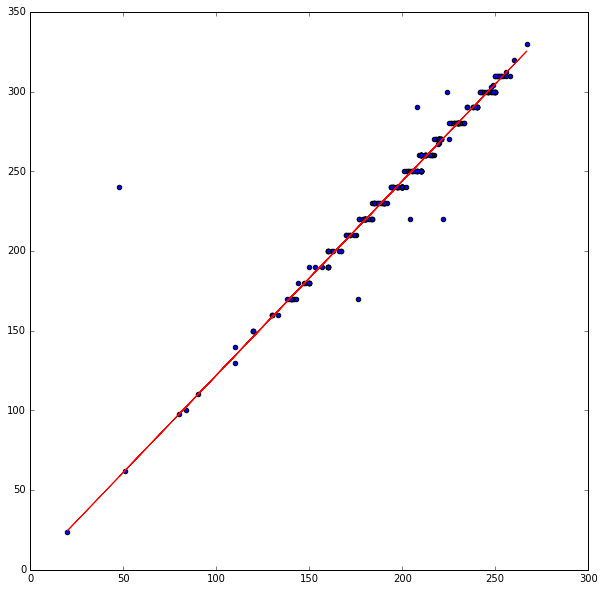

In [60]:
import scipy.stats as sp
import statsmodels.api as sm

alkrelate = chem_stations.dropna(subset=['HCO3','Alk'])
alkrelate
plt.scatter(alkrelate['Alk'],alkrelate['HCO3'])
x = alkrelate['Alk'] 
y = alkrelate['HCO3']

xa = sm.add_constant(x)

est = sm.RLM(y.astype(float), xa.astype(float)).fit()
r2 = sm.WLS(y.astype(float), xa.astype(float), weights=est.weights).fit().rsquared
slope = est.params[1]

#x_prime = np.linspace(np.min(x0), np.max(x0), 100)[:, np.newaxis]
#x_prime = sm.add_constant(x_prime)
#y_hat = est.predict(x_prime)

const = est.params[0]
#y2 = [i * slope + const for i in x0]



#slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
plt.plot(x,[i*slope+const for i in x],color='red')
print(r2)

for ind in chem_stations.index:
    if pd.isnull(chem_stations.loc[ind,'HCO3']) and pd.notnull(chem_stations.loc[ind,'Alk']):
        chem_stations.loc[ind,'HCO3'] = chem_stations.loc[ind,'Alk']*slope + const
        

In [61]:
chem_stations['complete'] = 0
par_list = ['Ca', 'Na', 'Mg', 'SO4', 'Cl', 'K', 'HCO3', 'CO3', 'NaK']
main_par = ['Ca', 'Na', 'Mg', 'SO4', 'Cl']
for i in chem_stations.index:
    dfrow = chem_stations.loc[i, par_list]
    if chem_stations.loc[i, main_par].notnull().all() and (pd.isnull(dfrow['CO3']) or '<' in str(dfrow['CO3'])):
        dfrow['CO3'] = 0
    if dfrow[main_par].notnull().all() and (pd.isnull(dfrow['NaK']) or '<' in str(dfrow['NaK'])):
        dfrow['NaK'] = 0
    if dfrow.isnull().any():
        pass
    elif dfrow.str.contains('<').any():
        pass
    else:
        dfrow = pd.to_numeric(chem_stations.loc[i, par_list], errors='coerce')
        chem_stations.loc[i, 'complete'] = 1

In [62]:
chem_stations['Elev'] = chem_stations[['Lon_X','Lat_Y']].apply(lambda x: wa.get_elev(x),1)


In [63]:
chem_stations['DMSDMS'] = chem_stations[['Lon_X','Lat_Y']].apply(lambda x: wa.USGSID(x),1)

In [64]:
#chem_stations = chem_stations[chem_stations['HUC10'].isin(HUC10s)]

In [65]:
chem_stations[chem_stations['HUC10'].notnull()]

,18O,2H,Ag,Al,Alk,As,B,Ba,Be,Br,...,WELL_ID,WIN,data_source,samp_date_y,wl_date,wl_ft,SampleTime,IsNewest,complete,DMSDMS
0,NaN,NaN,NaN,< 0.01,NaN,0.06,1.59,0.08,0.0781,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,0,0,414810113102801
1,NaN,NaN,NaN,< 0.01,NaN,0.06,1.59,0.08,0.0781,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,0,0,415250112470201
2,NaN,NaN,NaN,< 0.01,NaN,< 0.01,1.25,0.05,< 0.05,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,0,0,414810113102801
3,NaN,NaN,NaN,< 0.01,NaN,< 0.01,1.25,0.05,< 0.05,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,0,0,415250112470201
4,NaN,NaN,NaN,< 0.01,NaN,0.05,1.29,0.06,< 0.05,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,1,0,414810113102801
5,NaN,NaN,NaN,< 0.01,NaN,0.05,1.29,0.06,< 0.05,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,1,0,415250112470201
6,NaN,NaN,NaN,< 0.01,NaN,< 0.01,1.21,0.06,NaN,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,0,0,414810113102801
7,NaN,NaN,NaN,< 0.01,NaN,< 0.01,1.21,0.06,NaN,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,0,0,415250112470201
8,NaN,NaN,NaN,< 0.01,NaN,NaN,1.19,NaN,NaN,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,0,1,414810113102801
9,NaN,NaN,NaN,< 0.01,NaN,NaN,1.19,NaN,NaN,NaN,...,NaN,NaN,UGS SS126,NaT,NaT,NaN,00:00,0,1,415250112470201


In [43]:
chem_stations.loc[chem_stations['HUC12'].isnull():'HUC12'] = chem_stations[['Lon_X','Lat_Y']].apply(lambda x: wa.get_huc(x)[0],1)
chem_stations['HUC10'] = chem_stations['HUC12'].apply(lambda x: int(x[0:-2]),1)

JSONDecodeError: ('Expecting value: line 1 column 1 (char 0)', 'occurred at index 0')

In [66]:
df = chem_stations[chem_stations['complete']==1]
df1 = convertIons(df)

In [67]:
df2 = chem_stations[chem_stations['complete'] == 0]
df3 = pd.concat([df1,df2])

In [68]:
#df3.drop_duplicates(subset=['SampleId'],inplace=True)

In [69]:
df3.to_csv(saveplace+'chem_stations17.csv')

## Extras

In [101]:
import simplekml
kml = simplekml.Kml()
chem_stations.apply(lambda X: kml.newpoint(coords=[( X["Lon_X"],X["Lat_Y"])]) ,axis=1)
kml.save(path = saveplace+"data.kml")

In [ ]:
['Mayo_and_Klauk',
 'SS126_Stations',
 'SS126_Results',
 'Sheet7',
 'SS135_Results',
 'SS135_Stations',
 'WRI97_Results',
 'WRI97_Stations',
 'TechPub26_Results',
 'TechPub26_Stations',
 'TechPub38_Results',
 'TechPub38_Stations',
 'TechPub33_Results',
 'TechPub33_Stations']

In [101]:
wqp_stations.columns

Index(['OrgId', 'OrgName', 'StationId', 'StationName', 'StationType',
       'StationComment', 'HUC8', 'Lat_Y', 'Lon_X', 'HorAcc', 'HorAccUnit',
       'HorCollMeth', 'HorRef', 'Elev', 'ElevUnit', 'ElevAcc', 'ElevAccUnit',
       'ElevMeth', 'ElevRef', 'StateCode', 'CountyCode', 'Aquifer', 'FmType',
       'AquiferType', 'ConstDate', 'Depth', 'DepthUnit', 'HoleDepth',
       'HoleDUnit', 'HUC12', 'HUC10', 'data_source'],
      dtype='object')

In [32]:
wqpcols

Index(['OrgId', 'OrgName', 'StationId', 'StationName', 'StationType',
       'StationComment', 'HUC8', 'Lat_Y', 'Lon_X', 'HorAcc', 'HorAccUnit',
       'HorCollMeth', 'HorRef', 'Elev', 'ElevUnit', 'ElevAcc', 'ElevAccUnit',
       'ElevMeth', 'ElevRef', 'StateCode', 'CountyCode', 'Aquifer', 'FmType',
       'AquiferType', 'ConstDate', 'Depth', 'DepthUnit', 'HoleDepth',
       'HoleDUnit', 'HUC12', 'HUC10', 'data_source'],
      dtype='object')

In [31]:
wqpcols = wqp_stations.columns
for col in awqm_stations.columns:
    if col not in wqpcols:
        print(col)

In [117]:
all_stations['Elev'] = all_stations[['Lon_X','Lat_Y']].apply(lambda x: wa.get_elev(x),1)

KeyboardInterrupt: 

In [119]:
all_stations

,ActDate,ActStatus,Aquifer,AquiferType,ConstDate,CountyCode,Depth,DepthUnit,Depth_to_bedrock_ft,Easting,...,StationComment,StationId,StationName,StationType,System,USGSCAD,WELL_ID,WIN,Yr_drilled,data_source
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377718.1681,...,NaN,WRI97_148,(C-2-5)5ccc-2,Well,Deep,4039581122648,NaN,NaN,NaN,WRI 97
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378707.2462,...,NaN,WRI97_149,(C-2-5)5dcd-4,Well,Deep,4039591122606,NaN,NaN,NaN,WRI 97
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378824.5944,...,NaN,WRI97_154,(C-2-5)17abd-1,Well,Deep,4038501122559,NaN,NaN,NaN,WRI 97
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379947.7846,...,NaN,WRI97_153,(C-2-5)16baa-1,Well,Deep,4039051122512,NaN,NaN,NaN,WRI 97
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383451.4678,...,NaN,WRI97_152,(C-2-5)14dbb-1,Well,Deep,4038401122242,NaN,NaN,NaN,WRI 97
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384909.9386,...,NaN,WRI97_151,(C-2-5)13acc-1,Well,Deep,4038441122140,NaN,NaN,NaN,WRI 97
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387776.5883,...,NaN,WRI97_110,(C-2-4)8cdc-1,Well,Deep,4039131121939,NaN,NaN,NaN,WRI 97
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393040.4948,...,NaN,WRI97_109,(C-2-4)2abb-1,Well,Deep,4040511121556,NaN,NaN,NaN,WRI 97
8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393208.1352,...,NaN,WRI97_108,(C-2-4)2aba-1,Well,Deep,4040541121549,NaN,NaN,NaN,WRI 97
9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391229.9792,...,NaN,WRI97_111,(C-2-4)10cda-1,Well,Deep,4039191121712,NaN,NaN,NaN,WRI 97


In [118]:
all_stations = pd.concat([WRI97_Stations,SS126_Stations,SS135_Stations,
                         awqm_stations,sdwis_stations,wqp_stations],axis=0)
all_stations.columns

Index(['ActDate', 'ActStatus', 'Aquifer', 'AquiferType', 'ConstDate',
       'CountyCode', 'Depth', 'DepthUnit', 'Depth_to_bedrock_ft', 'Easting',
       'Elev', 'ElevAcc', 'ElevAccUnit', 'ElevMeth', 'ElevRef', 'ElevUnit',
       'Elevation', 'FACTYPETXT', 'FmType', 'HUC10', 'HUC12', 'HUC8',
       'HoleDUnit', 'HoleDepth', 'HorAcc', 'HorAccUnit', 'HorCollMeth',
       'HorRef', 'ID', 'LABEL', 'Lat_Y', 'Latitude', 'Location', 'Lon_X',
       'Longitude', 'MapScale', 'Northing', 'OWNER', 'OrgId', 'OrgName',
       'StateCode', 'StationComment', 'StationId', 'StationName',
       'StationType', 'System', 'USGSCAD', 'WELL_ID', 'WIN', 'Yr_drilled',
       'data_source'],
      dtype='object')

In [99]:
keep_cols = ['OrgId', 'OrgName','StationId', 'StationName',
             'Depth', 'Easting','Northing',
             'Elev', 'HUC10', 'HUC12', 'HUC8', 'Lat_Y', 
             'Lon_X', 
             'StationType','data_source']
all_stations[keep_cols].to_csv(saveplace+'all_stations.csv')